In [ ]:
import zipfile

def unzip_dir(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_path = 'archive.zip'
extract_to = 'dataset'
unzip_dir(zip_path, extract_to)

In [10]:
import cv2
import numpy as np
import mediapipe as mp
import os

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

# Directory containing images (update this with your dataset path)
DATASET_PATH = "dataset/ASL_Alphabet_Dataset/asl_alphabet_train"
SAVE_PATH = "keypoints/"

# Ensure save directory exists
os.makedirs(SAVE_PATH, exist_ok=True)

def extract_keypoints_from_image(image_path):
    """Extracts 21 hand keypoints from an image using MediaPipe Hands."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    # Initialize keypoints array (21 keypoints * 2D (x, y))
    keypoints = np.zeros((21, 2))  # (x, y) only

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for i, lm in enumerate(hand_landmarks.landmark):
                keypoints[i] = [lm.x, lm.y]  # Only 2D

    return keypoints.flatten()  # Convert to a 1D array (42 values)

# Process each image and save keypoints
for label in os.listdir(DATASET_PATH):  # A-Z folders
    label_path = os.path.join(DATASET_PATH, label)
    
    if not os.path.isdir(label_path):
        continue  # Skip non-folder items

    keypoints_list = []
    for img_file in os.listdir(label_path):  # Iterate over images
        img_path = os.path.join(label_path, img_file)
        keypoints = extract_keypoints_from_image(img_path)
        keypoints_list.append(keypoints)

    # Save extracted keypoints as .npy file
    save_file = os.path.join(SAVE_PATH, f"{label}.npy")
    np.save(save_file, np.array(keypoints_list))

    print(f"Extracted and saved keypoints for letter {label}")


I0000 00:00:1739306895.518232 1983813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
W0000 00:00:1739306895.544099 2001649 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739306895.556906 2001648 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Extracted and saved keypoints for letter R
Extracted and saved keypoints for letter U
Extracted and saved keypoints for letter I
Extracted and saved keypoints for letter N
Extracted and saved keypoints for letter G
Extracted and saved keypoints for letter Z
Extracted and saved keypoints for letter T
Extracted and saved keypoints for letter S
Extracted and saved keypoints for letter A
Extracted and saved keypoints for letter F
Extracted and saved keypoints for letter O
Extracted and saved keypoints for letter H
Extracted and saved keypoints for letter del
Extracted and saved keypoints for letter nothing
Extracted and saved keypoints for letter space
Extracted and saved keypoints for letter M
Extracted and saved keypoints for letter J
Extracted and saved keypoints for letter C
Extracted and saved keypoints for letter D
Extracted and saved keypoints for letter V
Extracted and saved keypoints for letter Q
Extracted and saved keypoints for letter X
Extracted and saved keypoints for letter E

In [25]:
# Load the .npy file
npy_file_path = os.path.join(SAVE_PATH, 'R.npy')
data = np.load(npy_file_path)

# Print the contents of the .npy file
print(data)

[[0.51592135 0.79288393 0.56147438 ... 0.67494166 0.51316661 0.70132178]
 [0.50547904 0.8363142  0.44052976 ... 0.56610018 0.62107825 0.63256425]
 [0.75000995 0.80929238 0.82559866 ... 0.64369833 0.72022974 0.68646944]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.33029056 0.80917561 0.41484818 ... 0.56785339 0.25653893 0.63003004]
 [0.27491578 0.69037759 0.34623915 ... 0.51920813 0.232621   0.56023091]]


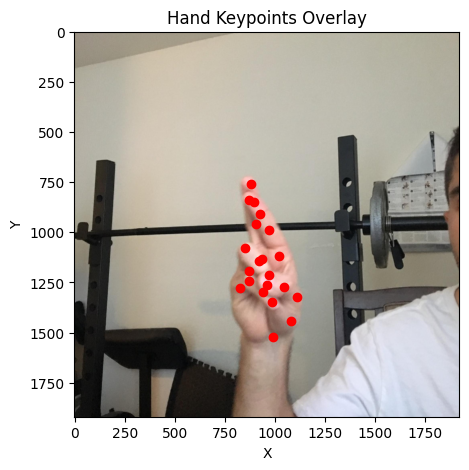

In [26]:
import matplotlib.pyplot as plt

def visualize_keypoints(keypoints):
    """Visualizes the 21 hand keypoints using matplotlib."""
    keypoints = keypoints.reshape((21, 2))  # Reshape to (21, 2)
    
    plt.figure(figsize=(5, 5))
    plt.scatter(keypoints[:, 0], keypoints[:, 1], c='r')
    plt.title('Hand Keypoints')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.show()

def visualize_keypoints_with_image(keypoints, image_path):
    """Visualizes the 21 hand keypoints overlaid on the image using matplotlib."""
    keypoints = keypoints.reshape((21, 2))  # Reshape to (21, 2)
    
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.scatter(keypoints[:, 0] * image.shape[1], keypoints[:, 1] * image.shape[0], c='r')
    plt.title('Hand Keypoints Overlay')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

img_path = "dataset/ASL_Alphabet_Dataset/asl_alphabet_train/R/63.jpg"
# Example usage with the first set of keypoints and corresponding image
visualize_keypoints_with_image(data[0], img_path)


